## YOLO algorithm (You Only Look Once)

Este algoritmo detecta objectos en imágenes. Este modelo está precargado en la librería opencv (computer visión).
Este es un modelo de red neuronal convolucional (CNN) las cuales detecta objetos preconfigurados (coco.names)

Solo hay que descargar las categorías de objetos, los pesos del modelo YOLO y la configuración de inicio del modelo. Adicionalmente importar las funciones en el script utils.py

1. [categoría de objetos (coco.names)](https://github.com/pjreddie/darknet/blob/master/data/coco.names)
2. [configuración del modelo (yolo3.cfg)](https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg)
3. [Pesos del modelo (yolo3.weights)](https://pjreddie.com/media/files/yolov3.weights)

In [2]:
#Import libraries
import cv2 as cv
import numpy as np
from utils import post_process
import matplotlib.pyplot as plt

In [3]:
#white/black colors in RGB
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)

In [5]:
# Load names of classes
classes = open('darknet/data/coco.names').read().strip().split('\n')

In [7]:
#Configuration model
modelConfiguration = "darknet/cfg/yolov3.cfg"
modelWeights = "darknet/cfg/yolov3.weights"

net = cv.dnn.readNetFromDarknet(modelConfiguration, modelWeights) #CNN in openCV
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV) #options backend
net.setPreferableTarget(cv.dnn.DNN_TARGET_CPU) 

In [8]:
#Select output layers
ln = net.getLayerNames()
ln_out = [ln[i - 1] for i in net.getUnconnectedOutLayers()]

In [9]:
#Select image
img_path = "img.jpg"

In [10]:
img = cv.imread(img_path) #read image
img0 = img.copy()
blob = cv.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False) #encode image to process in model
net.setInput(blob) #Input img in model
outputs = net.forward(ln_out) #Get the outputs of the model
outputs = np.vstack(outputs) #Stack in one column the outputs of the model

In [11]:
res = post_process(img, outputs, thres=0.5, conf=0.6, 
            COCO_names=classes, coltext=BLACK) #post image process 

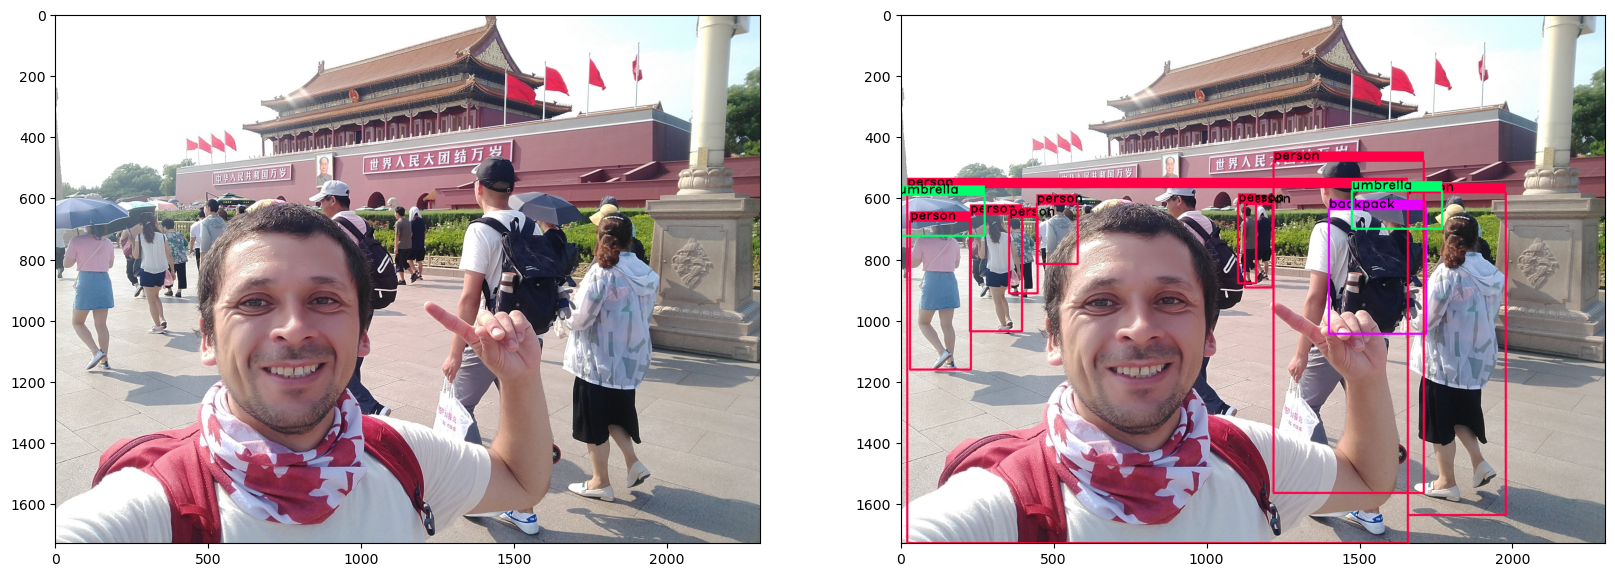

In [12]:
#show the original image and the result
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
ax = fig.add_subplot(1, 2, 2)
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()

In [13]:
#save the result
cv.imwrite('output.jpg', res)

True

Tips: Para obtener información del modelo darknet para yolo3 ir a [Yolo website](https://pjreddie.com/darknet/yolo/)